# Linear SVM Classification

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2,3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [2]:
svm_clf.predict([[5.5, 1.7]]) # No probability unlike Logistic Classifier

array([1.])

You could use the SVC class using `SVC(kernel="linear", C=1)` but it would be much slower.
ou can also use the `SGDClassifier(loss="hinge", alpha=1/(m*C))` that uses Stochastic Gradient Descent. It does not converge as fast as the `LinearSVC` but can handle huge datasets that do not fit in memory - out of core training - or to handle online classificiation tasks.
The LineartSVC regularizes the bias term so you should always center the training set first.
Make sure you set the loss hyperparameter to "hinge" as it is not the default.
Set the dual hyperparameter to False unless there are more features than training instances.

# Nonlinear SVM Classification

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [4]:
# Adding features to make dataset linearly separable

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

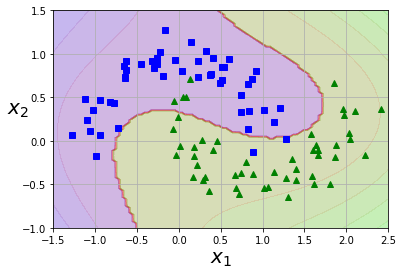

In [5]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha = 0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

In [6]:
x0 = np.linspace(0, 10, 100)
x1 = np.linspace(0, 1, 100)

## Polynomial Kernel

In [7]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5)),
])

poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [8]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape='ovr', degree=10, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

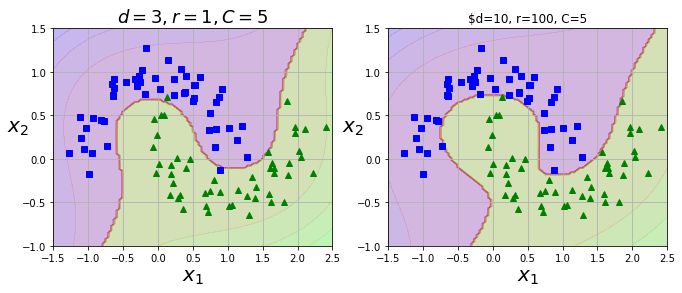

In [9]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5")

plt.show()

## Adding Similarity Features

In [10]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf"))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

# SVM Regression

In [11]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [12]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Exercises

## Exercice 8

In [13]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris["data"][:,(2,3)]
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)

X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

C = 5
alpha = 1 / (C * len(X))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lsvc_clf = LinearSVC(loss="hinge", C=C, random_state=42)
sgd_clf = SGDClassifier(loss="hinge", alpha=alpha, random_state=42, max_iter=1000)
svc_clf = SVC(kernel="linear", C=C, random_state=42)

lsvc_clf.fit(X_scaled, y)
sgd_clf.fit(X_scaled, y)
svc_clf.fit(X_scaled, y)


SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
print("LinearSVC : ", lsvc_clf.intercept_, lsvc_clf.coef_)
print("SGDClassifier : ", sgd_clf.intercept_, sgd_clf.coef_)
print("SVC : ", svc_clf.intercept_, svc_clf.coef_)

LinearSVC :  [0.28481447] [[1.05541976 1.09851597]]
SGDClassifier :  [0.32233983] [[1.12432437 1.0293165 ]]
SVC :  [0.31933577] [[1.1223101  1.02531081]]


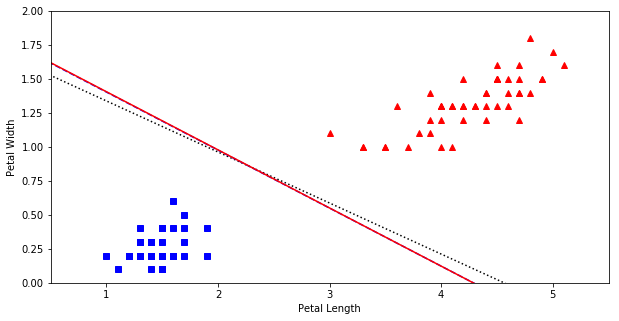

In [16]:
import matplotlib.pyplot as plt

w1 = -lsvc_clf.coef_[0, 0]/lsvc_clf.coef_[0, 1]
b1 = -lsvc_clf.intercept_[0]/lsvc_clf.coef_[0, 1]
w2 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b2 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]
w3 = -svc_clf.coef_[0, 0]/svc_clf.coef_[0, 1]
b3 = -svc_clf.intercept_[0]/svc_clf.coef_[0, 1]

line1 = scaler.inverse_transform([[-10, -10*w1 + b1], [10, 10*w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10*w2 + b2], [10, 10*w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10*w3 + b3], [10, 10*w3 + b3]])

plt.figure(figsize=(10, 5))

plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "r^")

plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", label="SGDClassifier")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SVC")

plt.axis([0.5, 5.5, 0, 2])

plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

## Exercise 9

In [17]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")
X = mnist["data"]
y = mnist["target"]

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

np.random.seed(42)
rand_perm = np.random.permutation(60000)
X_train = X_train[rand_perm]
y_train = y_train[rand_perm]

In [18]:
X_train.shape

(60000, 784)

In [19]:
lin_clf = LinearSVC()
lin_clf.fit(X_train[:1000], y_train[:1000])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, lin_clf.predict(X_train))

0.8177833333333333

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

lin_clf.fit(X_scaled[:1000], y_train[:1000])
accuracy_score(y_train, lin_clf.predict(X_scaled))

C:\Users\Quarint\Anaconda3\envs\mlbook\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.77915

In [22]:
from sklearn.svm import SVC
svc_clf = SVC()
svc_clf.fit(X_scaled[:1000], y_train[:1000])
accuracy_score(y_train, svc_clf.predict(X_scaled))

0.8709

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_grid = {'gamma': reciprocal(0.001, 0.1), 'C': uniform(1, 10)}

svc_clf = SVC()
rand_grid = RandomizedSearchCV(svc_clf, param_distributions=param_grid, n_iter=10, verbose=2)
rand_grid.fit(X_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=2.2350452844489768, gamma=0.0014636566224776645 ...............
[CV]  C=2.2350452844489768, gamma=0.0014636566224776645, total=   0.4s
[CV] C=2.2350452844489768, gamma=0.0014636566224776645 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  C=2.2350452844489768, gamma=0.0014636566224776645, total=   0.5s
[CV] C=2.2350452844489768, gamma=0.0014636566224776645 ...............
[CV]  C=2.2350452844489768, gamma=0.0014636566224776645, total=   0.5s
[CV] C=5.018902332387908, gamma=0.05957167873858634 ..................
[CV] ... C=5.018902332387908, gamma=0.05957167873858634, total=   0.7s
[CV] C=5.018902332387908, gamma=0.05957167873858634 ..................
[CV] ... C=5.018902332387908, gamma=0.05957167873858634, total=   0.6s
[CV] C=5.018902332387908, gamma=0.05957167873858634 ..................
[CV] ... C=5.018902332387908, gamma=0.05957167873858634, total=   0.7s
[CV] C=9.55269519672093, gamma=0.013182136929486901 ..................
[CV] ... C=9.55269519672093, gamma=0.013182136929486901, total=   0.7s
[CV] C=9.55269519672093, gamma=0.013182136929486901 ..................
[CV] ... C=9.55269519672093, gamma=0.013182136929486901, total=   0.6s
[CV] C=9.55269519672093, gamma=0.013182136929486901 ..................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   29.9s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F0016E1710>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F0016E1B70>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [25]:
rand_grid.best_estimator_

SVC(C=2.2350452844489768, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0014636566224776645,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [27]:
rand_grid.best_estimator_.fit(X_scaled, y_train)
y_pred = rand_grid.best_estimator_.predict(X_scaled)
accuracy_score(y_train, y_pred)

0.9939

## Exercise 9

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [13]:
import pandas as pd
X_df = pd.DataFrame(housing["data"], columns = housing.feature_names)
y_df = pd.DataFrame(housing["target"], columns = ["price"])

In [16]:
df = X_df.join(y_df)
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [17]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train_scaled, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [19]:
from sklearn.metrics import mean_squared_error

y_pred = lin_svr.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
mse

0.9612806653297273

In [21]:
import numpy as np
np.sqrt(mse)

0.9804492160890983

In [34]:
from sklearn.svm import SVR
from scipy.stats import reciprocal, uniform
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': reciprocal(0.001, 0.1), 'C': uniform(1, 10)}

rbf_svr = SVR()

random_search = RandomizedSearchCV(rbf_svr, param_grid, n_iter=10, verbose=2, random_state=43)

In [35]:
random_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................
[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   5.2s
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   5.2s
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................
[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=   5.2s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   5.1s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   4.7s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   4.8s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .. C=2.560186404424365, gamma=0.002051110418843397, total=   4.3s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .. C=2.560186404424365, gamma=0.002051110418843397, total=   4.3s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.2min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002744C9DA358>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002744C94A518>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [39]:
random_search.best_estimator_

SVR(C=4.745401188473625, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma=0.07969454818643928, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
y_pred = random_search.best_estimator_.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

0.5727524770785357

In [40]:
y_pred = random_search.best_estimator_.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

1.106667307704326